## PROJETO MENTORIA DSA - 2021 #
## PROBLEMA:  Prever quando um país estará com a pandemia sob controle.
 
## Dataset desenvolvido a partir de informações de: 
https://github.com/CSSEGISandData/COVID-19

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv("dataset/owid-covid-data-26-06-2021.csv", sep=",", header=0)
dataset.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98229 entries, 0 to 98228
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               98229 non-null  object 
 1   continent                              93614 non-null  object 
 2   location                               98229 non-null  object 
 3   date                                   98229 non-null  object 
 4   total_cases                            94775 non-null  float64
 5   new_cases                              94772 non-null  float64
 6   new_cases_smoothed                     93762 non-null  float64
 7   total_deaths                           84685 non-null  float64
 8   new_deaths                             84841 non-null  float64
 9   new_deaths_smoothed                    93762 non-null  float64
 10  total_cases_per_million                94270 non-null  float64
 11  ne

In [4]:
dataset.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
count,9.477500e+04,94772.000000,93762.000000,8.468500e+04,84841.000000,93762.000000,94270.000000,94267.000000,93262.000000,84193.000000,...,59538.000000,88222.000000,90452.000000,69013.000000,68004.000000,44328.000000,80377.000000,93273.000000,88368.000000,3463.000000
mean,1.040674e+06,6044.209682,6071.178116,2.828512e+04,146.934065,132.103936,12813.407304,76.126470,76.408417,284.402427,...,13.400685,258.413930,7.921591,10.562455,32.690520,50.839871,3.028012,73.236288,0.727418,18.259939
std,7.139992e+06,37866.216616,37617.047442,1.687084e+05,803.712713,746.114443,23671.436137,200.149082,158.864582,515.827853,...,19.958188,119.007582,4.138841,10.460222,13.483733,31.759405,2.459285,7.560131,0.150374,36.111776
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,...,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-95.590000
25%,1.224000e+03,2.000000,7.429000,5.300000e+01,0.000000,0.000000,255.129500,0.211000,1.281250,7.890000,...,0.600000,167.295000,5.310000,1.900000,21.600000,19.351000,1.300000,67.920000,0.602000,0.365000
50%,1.330800e+04,73.000000,91.429000,3.780000e+02,2.000000,1.429000,1752.937000,8.342000,10.995000,50.844000,...,2.200000,242.648000,7.110000,6.300000,31.400000,49.839000,2.400000,74.620000,0.748000,7.340000
75%,1.414915e+05,803.250000,846.499750,3.687000e+03,18.000000,14.429000,13252.876750,70.261000,78.701250,309.667000,...,21.200000,329.635000,10.080000,19.300000,41.100000,83.241000,3.861000,78.740000,0.848000,23.875000
max,1.804101e+08,906008.000000,826389.571000,3.909437e+06,18050.000000,14737.000000,179667.379000,18293.675000,4083.500000,5806.378000,...,77.600000,724.417000,30.530000,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,409.690000


In [5]:
dataset.dtypes

iso_code                                  object
continent                                 object
location                                  object
date                                      object
total_cases                              float64
new_cases                                float64
new_cases_smoothed                       float64
total_deaths                             float64
new_deaths                               float64
new_deaths_smoothed                      float64
total_cases_per_million                  float64
new_cases_per_million                    float64
new_cases_smoothed_per_million           float64
total_deaths_per_million                 float64
new_deaths_per_million                   float64
new_deaths_smoothed_per_million          float64
reproduction_rate                        float64
icu_patients                             float64
icu_patients_per_million                 float64
hosp_patients                            float64
hosp_patients_per_mi

In [6]:
dataset.drop(columns=['iso_code', 'continent'], inplace=True)

In [7]:
dataset['tests_units'].unique()

array([nan, 'tests performed', 'people tested', 'units unclear',
       'samples tested'], dtype=object)

In [8]:
# Alterando tipo objeto para categórico
dataset['tests_units'] = dataset['tests_units'].astype('category')

In [9]:
# Validando alteração
dataset['tests_units'].dtypes

CategoricalDtype(categories=['people tested', 'samples tested', 'tests performed',
                  'units unclear'],
                 ordered=False)

In [10]:
# Substituição dos valros NA para variável tests_units
dataset['tests_units'] = dataset['tests_units'].cat.add_categories('no information')
dataset['tests_units'].fillna('no information', inplace=True)

In [11]:
dataset['tests_units'].unique()

['no information', 'tests performed', 'people tested', 'units unclear', 'samples tested']
Categories (5, object): ['no information', 'tests performed', 'people tested', 'units unclear', 'samples tested']

In [12]:
# Convertendo a coluna date para class date
dataset['date'] = pd.to_datetime(dataset['date'])
dataset['date'].head(5)

0   2020-02-24
1   2020-02-25
2   2020-02-26
3   2020-02-27
4   2020-02-28
Name: date, dtype: datetime64[ns]

In [13]:
# Convertendo a variável location em categoria
dataset['location'] = dataset['location'].astype('category')

In [14]:
dataset.dtypes

location                                       category
date                                     datetime64[ns]
total_cases                                     float64
new_cases                                       float64
new_cases_smoothed                              float64
total_deaths                                    float64
new_deaths                                      float64
new_deaths_smoothed                             float64
total_cases_per_million                         float64
new_cases_per_million                           float64
new_cases_smoothed_per_million                  float64
total_deaths_per_million                        float64
new_deaths_per_million                          float64
new_deaths_smoothed_per_million                 float64
reproduction_rate                               float64
icu_patients                                    float64
icu_patients_per_million                        float64
hosp_patients                                   

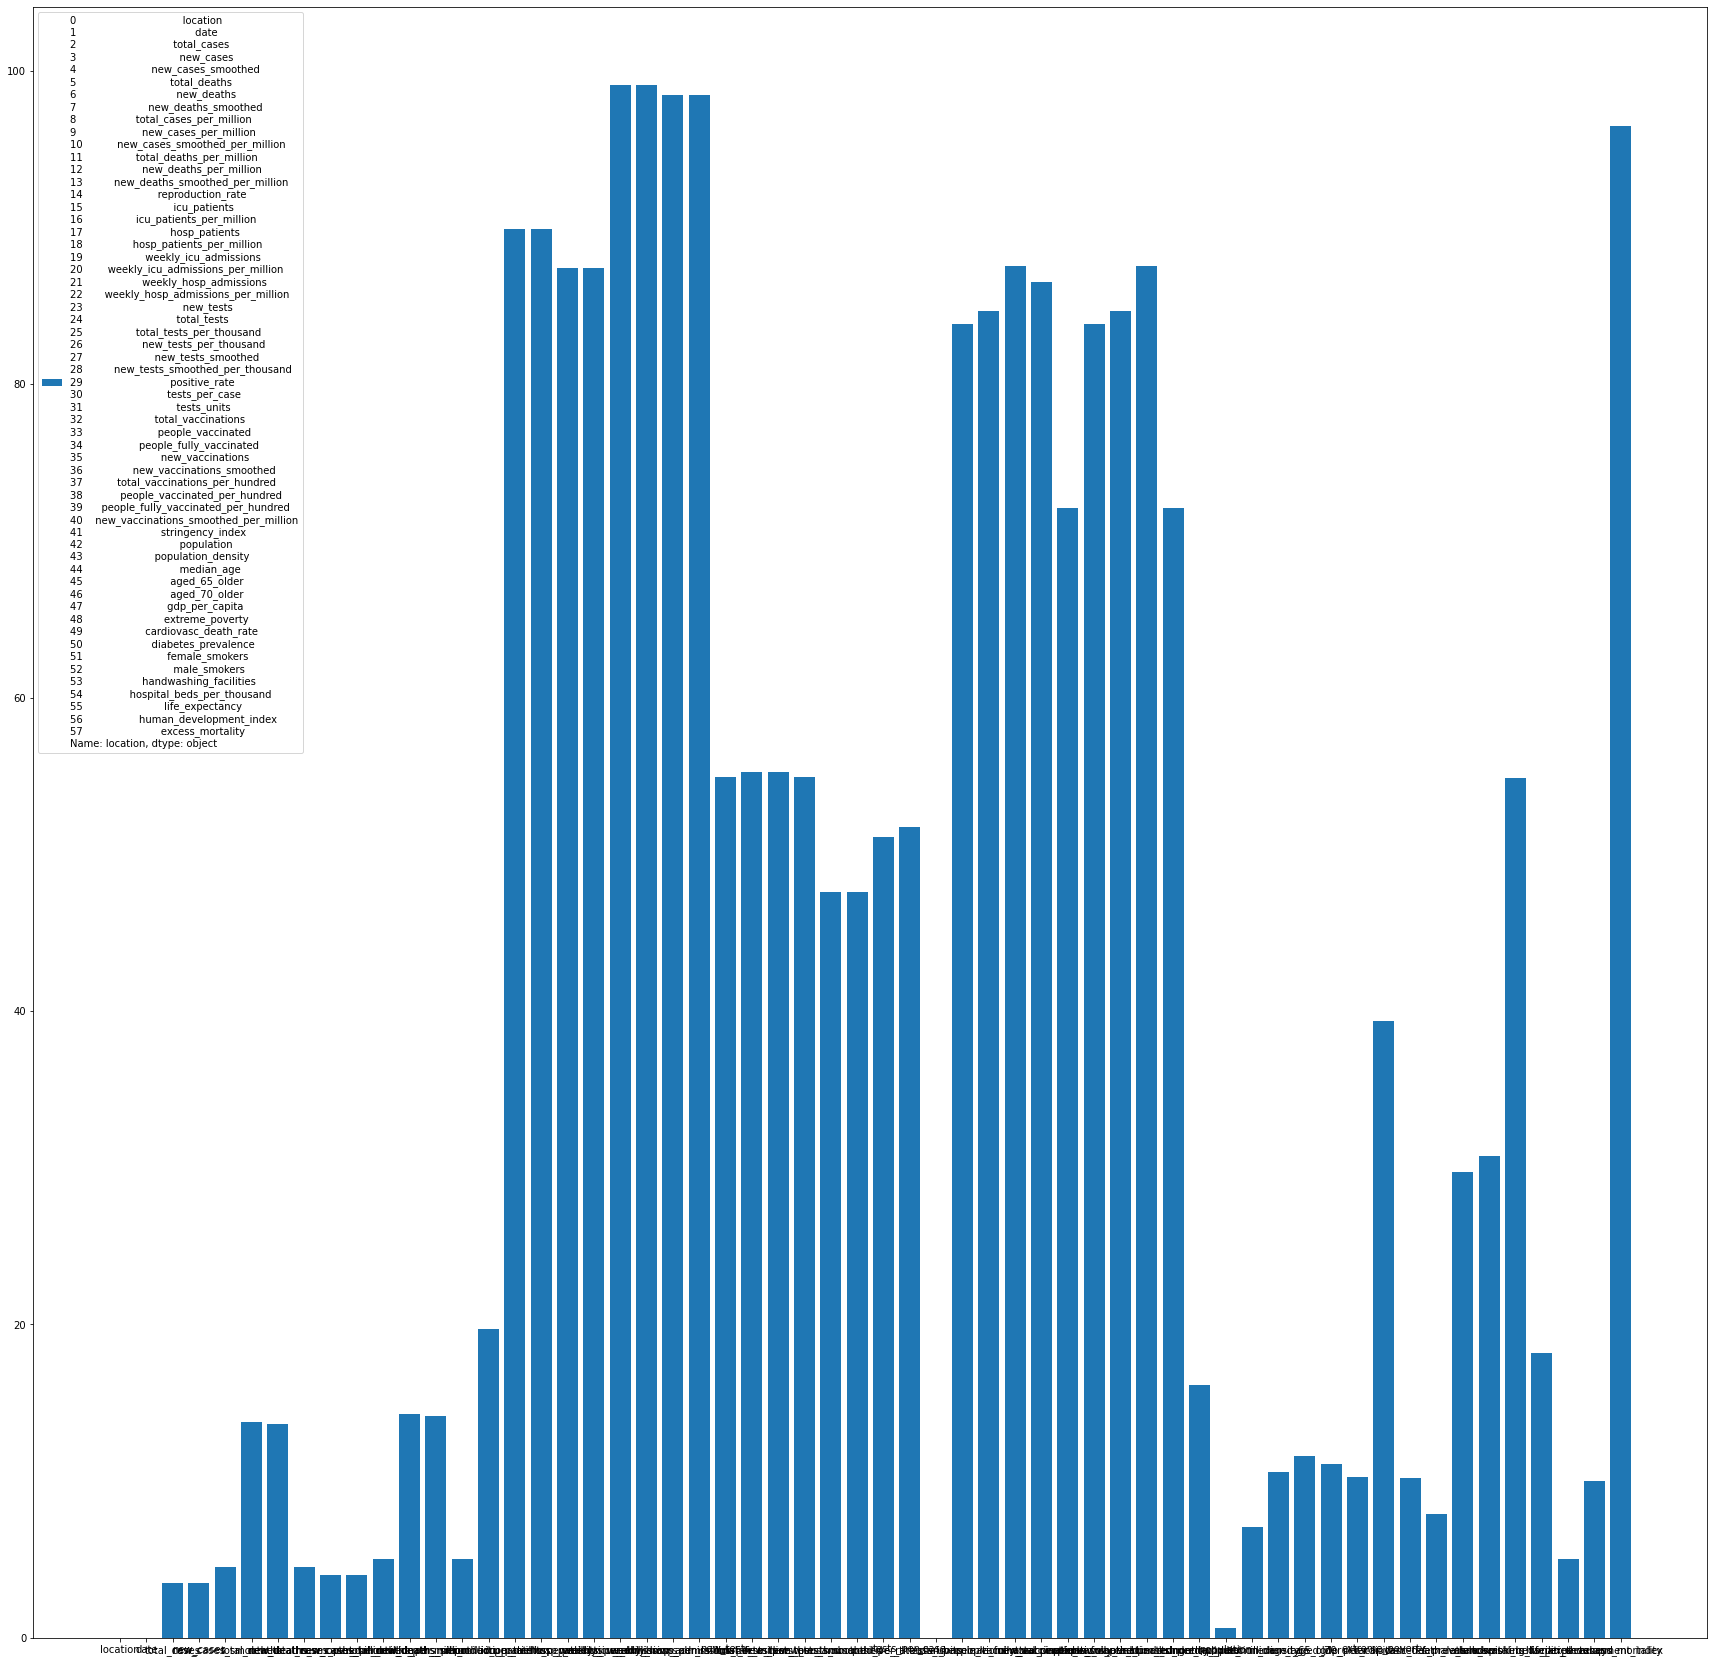

In [15]:
# Validação porcentagem dos valores NA
porcentagem_na = (dataset.isna().sum() / dataset.shape[0]) * 100
porc_columns = porcentagem_na.index.tolist()
porc_values = porcentagem_na.values.tolist()

porc_df = pd.DataFrame({'location': porc_columns, 'percentage': porc_values})


plt.subplots(figsize=(30, 30))
plt.bar(porc_df['location'], porc_df['percentage'], label=porc_df['location'])
plt.legend(loc='upper left')

## Distribuição dos valores NA

Com base em uma primeira análise, o alto índice de valores NA em algumas variáveis fazem sentido 
visto que a vacina foi disponibilizada quase 1 ano após o início da pandemia. 

In [16]:
# Verificando o início da vacinação
dataset[dataset['total_vaccinations'] >= 1][['date', 'location', 'total_vaccinations']].sort_values(by=['date',  'total_vaccinations'], ascending=True).groupby(by=['date', 'location']).head(5)

,date,location,total_vaccinations
29867,2020-12-13,Europe,8.646500e+04
92899,2020-12-13,United Kingdom,8.646500e+04
96664,2020-12-13,World,8.646500e+04
16202,2020-12-14,Canada,5.000000e+00
65221,2020-12-14,North America,5.000000e+00
...,...,...,...
65414,2021-06-25,North America,4.212851e+08
30061,2021-06-25,Europe,4.819498e+08
18982,2021-06-25,China,1.143805e+09
5142,2021-06-25,Asia,1.752229e+09


Podemos confirmar que o início da vacinação deu-se em 13/12/2020 e com isso a confirmação do alto índice de NA
em algumas colunas. 
Também, conseguimos identificar uma localidade denomida 'World', que subentendesse como sendo um totalizador. 
Deste modo, vamos análisar essa observação para uma possível remoção da mesma.

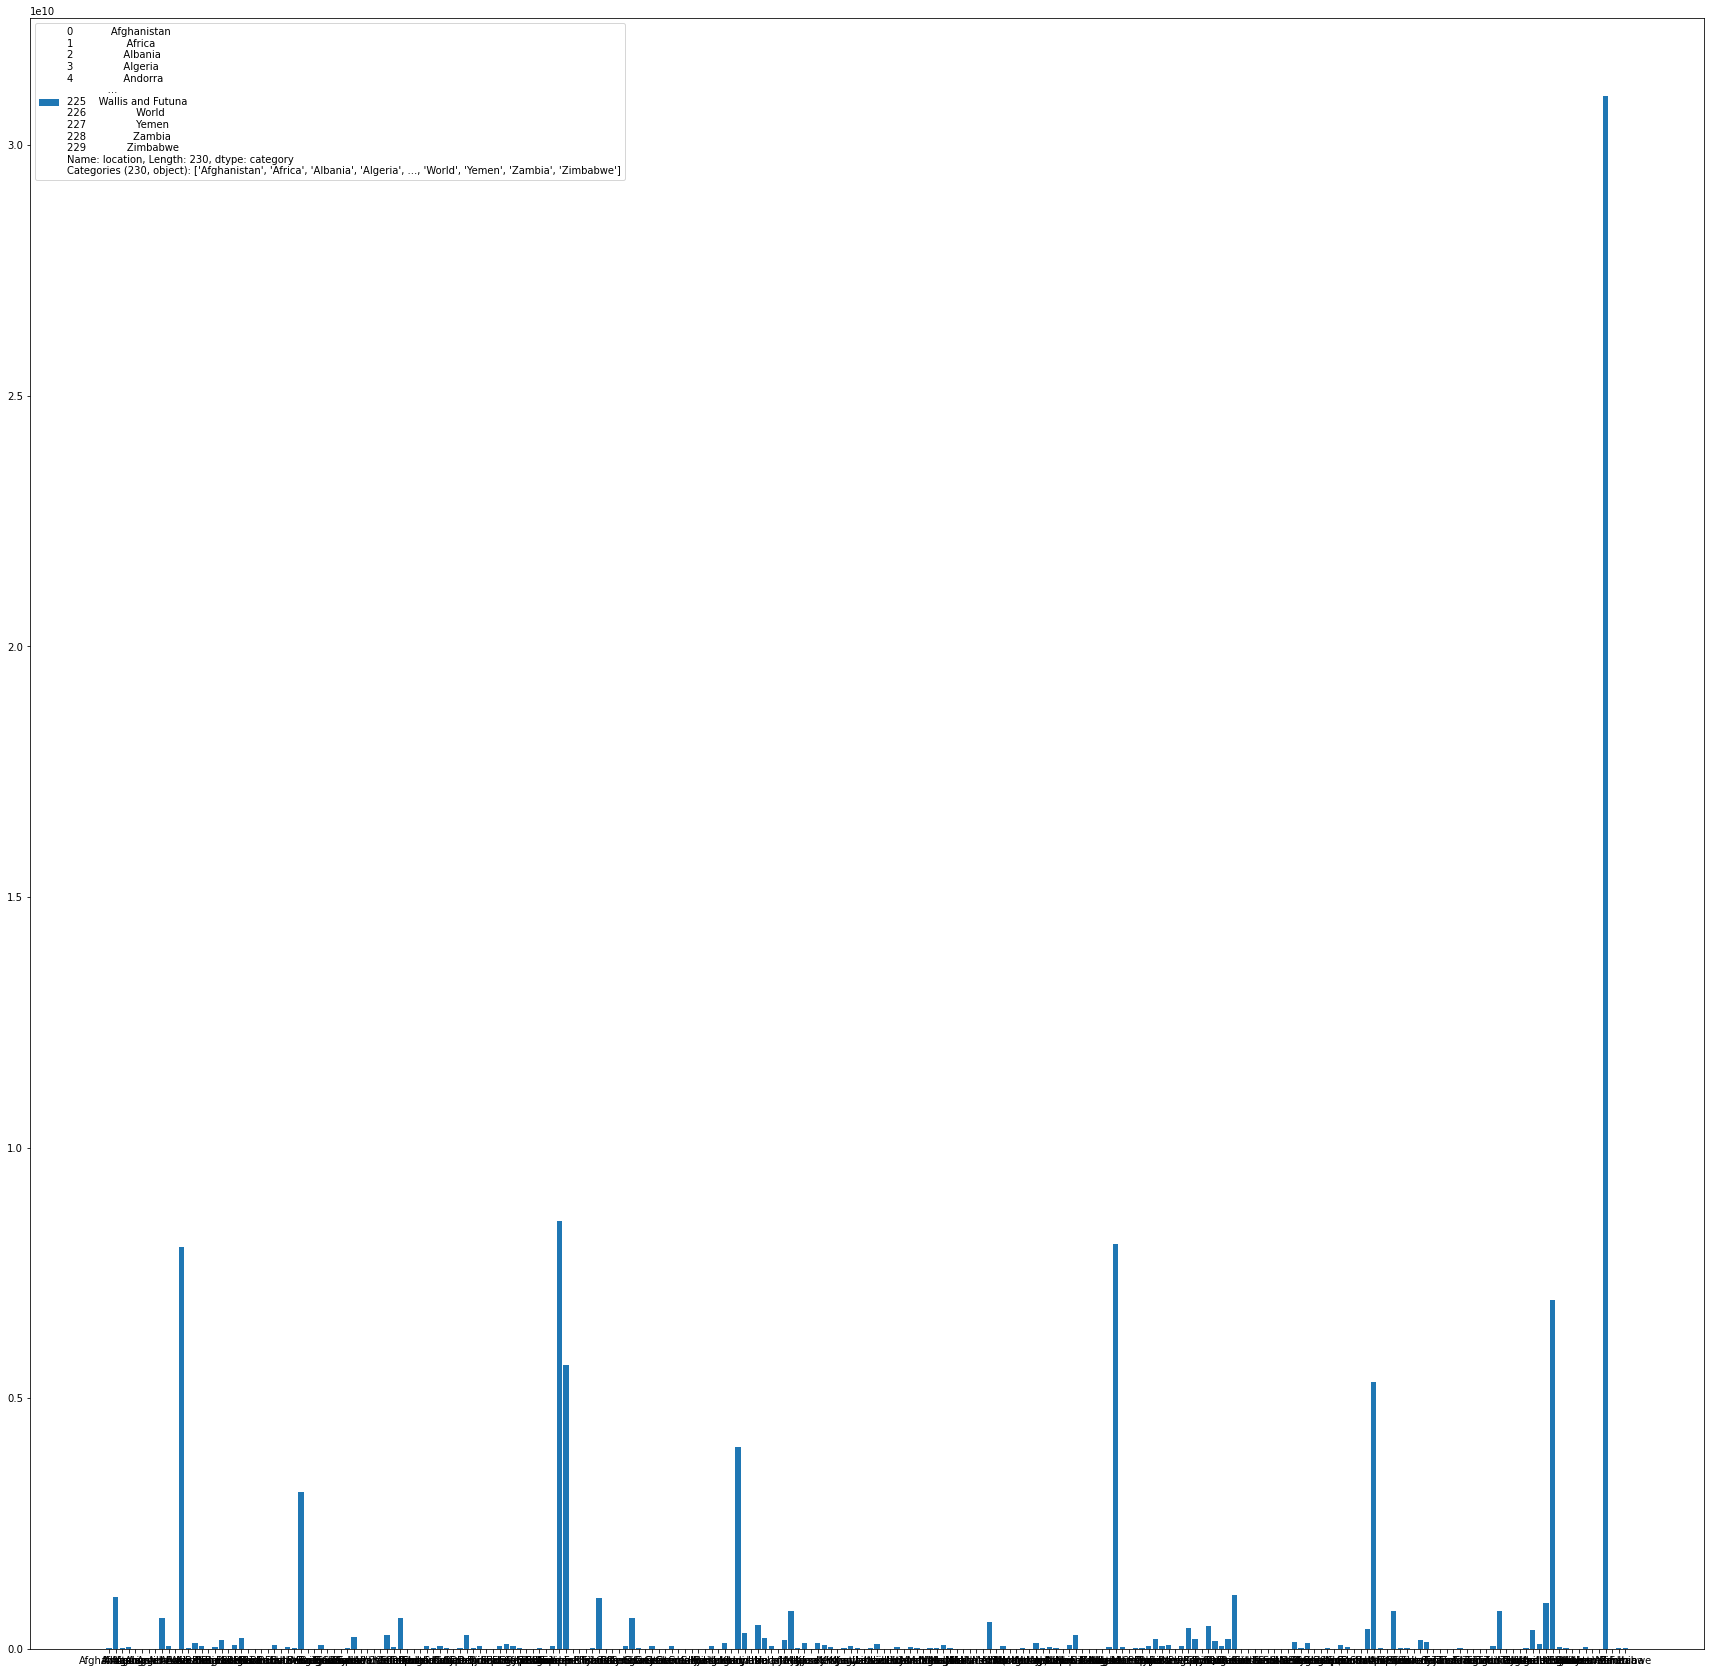

In [17]:
casos_por_localidade = dataset[['location', 'total_cases']].groupby(by='location').sum().reset_index()

plt.subplots(figsize=(30, 30))
plt.bar(casos_por_localidade['location'], casos_por_localidade['total_cases'], label=casos_por_localidade['location'])
plt.legend(loc='upper left')

In [18]:
# Com o gráfico subentendesse que o maior pico é da localidade World, para confirmar, vamos ordernar os dados
casos_por_localidade.sort_values(by=['total_cases'], ascending=False)

,location,total_cases
226,World,3.099018e+10
68,Europe,8.536391e+09
152,North America,8.070059e+09
11,Asia,8.019693e+09
218,United States,6.951149e+09
...,...,...
39,Cayman Islands,0.000000e+00
185,Sint Maarten (Dutch part),0.000000e+00
30,British Virgin Islands,0.000000e+00
26,Bonaire Sint Eustatius and Saba,0.000000e+00


 Com isso, iremos remover as observações para localidade 'World'

In [19]:
dataset = dataset[dataset['location'] != 'World']
dataset.shape

(97708, 58)

Outro ponto identificado foram os valores negativos no dataset. 
Como não temos informações do motivo, esses mesmos valores serão removidos. O filtro será aplicado em todas as colunas.

In [20]:
def fn_negative_numbers(col_name):
    return dataset[ dataset[col_name] < 0 ].index

In [21]:
for col in dataset.columns:
    if dataset[col].dtype == 'float64':
        index = fn_negative_numbers(col).tolist()
        dataset.drop(index, inplace=True)

In [22]:
dataset.shape

(96560, 58)

### Podemos observar que as seguintes variáveis possuem mais de 80% dos valores incompletos:
- weekly_icu_admissions                    
- weekly_icu_admissions_per_million        
- weekly_hosp_admissions                   
- weekly_hosp_admissions_per_million       
- icu_patients                             
- icu_patients_per_million                 
- hosp_patients                            
- hosp_patients_per_million  
- total_vaccinations_per_hundred           
- people_vaccinated_per_hundred            
- people_fully_vaccinated_per_hundred
- excess_mortality
- handwashing_facilities

Outras ainda possuem um alto indice porém iremos manter, momentaneamente.

Também, algumas outras variáveis que não são do nosso interesse.
- aged_65_older
- aged_70_older
- female_smokers
- male_smokers
- life_expectancy
- hospital_beds_per_thousand
- new_vaccinations_smoothed
- new_vaccinations_smoothed_per_million
- new_cases_smoothed_per_million
- total_cases_per_million
- new_cases_per_million
- total_deaths_per_million
- new_deaths_per_million
- new_deaths_smoothed_per_million
- total_tests_per_thousand
- new_tests_per_thousand
- new_tests_smoothed
- new_tests_smoothed_per_thousand
- new_deaths_smoothed
- new_cases_smoothed

In [23]:
dataset.isna().sum()

location                                     0
date                                         0
total_cases                               3426
new_cases                                 3429
new_cases_smoothed                        4405
total_deaths                             13387
new_deaths                               13231
new_deaths_smoothed                       4405
total_cases_per_million                   3931
new_cases_per_million                     3934
new_cases_smoothed_per_million            4905
total_deaths_per_million                 13879
new_deaths_per_million                   13723
new_deaths_smoothed_per_million           4905
reproduction_rate                        19162
icu_patients                             87002
icu_patients_per_million                 87002
hosp_patients                            84705
hosp_patients_per_million                84705
weekly_icu_admissions                    95871
weekly_icu_admissions_per_million        95871
weekly_hosp_a

In [24]:
columns_to_drop = ['weekly_icu_admissions', 
                   'weekly_icu_admissions_per_million', 
                   'weekly_hosp_admissions',
                   'weekly_hosp_admissions_per_million',
                   'icu_patients',
                   'icu_patients_per_million',
                   'hosp_patients',
                   'hosp_patients_per_million',
                   'total_vaccinations_per_hundred',
                   'people_vaccinated_per_hundred',
                   'people_fully_vaccinated_per_hundred',
                   'excess_mortality',
                   'handwashing_facilities',
                   'aged_65_older',
                   'aged_70_older',
                   'female_smokers',
                   'male_smokers',
                   'life_expectancy',
                   'hospital_beds_per_thousand',
                   'new_vaccinations_smoothed',
                   'new_vaccinations_smoothed_per_million',
                   'new_cases_smoothed_per_million',
                   'total_cases_per_million',
                   'new_cases_per_million',
                   'total_deaths_per_million',
                   'new_deaths_per_million',
                   'new_deaths_smoothed_per_million',
                   'total_tests_per_thousand',
                   'new_tests_per_thousand',
                   'new_tests_smoothed',
                   'new_tests_smoothed_per_thousand',
                   'new_deaths_smoothed',
                   'new_cases_smoothed']
dataset.drop(columns=columns_to_drop, inplace=True)

In [25]:
dataset.head(5)

,location,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,new_tests,total_tests,positive_rate,...,new_vaccinations,stringency_index,population,population_density,median_age,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,human_development_index
0,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.33,38928341.0,54.422,18.6,1803.987,NaN,597.029,9.59,0.511
1,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.33,38928341.0,54.422,18.6,1803.987,NaN,597.029,9.59,0.511
2,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.33,38928341.0,54.422,18.6,1803.987,NaN,597.029,9.59,0.511
3,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.33,38928341.0,54.422,18.6,1803.987,NaN,597.029,9.59,0.511
4,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.33,38928341.0,54.422,18.6,1803.987,NaN,597.029,9.59,0.511


In [26]:
dataset.describe()

,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,new_tests,total_tests,positive_rate,tests_per_case,total_vaccinations,...,new_vaccinations,stringency_index,population,population_density,median_age,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,human_development_index
count,9.313400e+04,93131.000000,8.317300e+04,83329.000000,77398.000000,4.352700e+04,4.320400e+04,47272.000000,46688.000000,1.543700e+04,...,1.283400e+04,81289.00000,9.592100e+04,89647.000000,86210.000000,86561.000000,58227.000000,86596.000000,88818.000000,86759.000000
mean,7.237364e+05,4215.512858,1.971104e+04,102.540232,1.001771,4.773029e+04,7.638651e+06,0.089714,160.023284,2.011396e+07,...,4.498134e+05,58.47992,8.462933e+07,386.588807,30.456815,19116.612486,13.567807,259.327739,7.934891,0.725650
std,3.704916e+06,21850.290856,8.590376e+04,448.342978,0.350341,1.749210e+05,3.348124e+07,0.097474,892.143034,9.174054e+07,...,2.056452e+06,21.04116,3.877547e+08,1793.603517,9.133485,19971.582864,20.113866,119.183322,4.159655,0.150504
min,1.000000e+00,0.000000,1.000000e+00,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000,1.100000,0.000000e+00,...,0.000000e+00,0.00000,4.700000e+01,0.137000,15.100000,661.240000,0.100000,79.370000,0.990000,0.394000
25%,1.213000e+03,2.000000,5.300000e+01,0.000000,0.840000,1.655000e+03,1.592805e+05,0.017000,7.600000,1.105310e+05,...,4.446750e+03,44.44000,2.225728e+06,36.253000,22.000000,4449.898000,0.600000,168.711000,5.310000,0.602000
50%,1.322750e+04,73.000000,3.680000e+02,2.000000,1.010000,6.162000e+03,8.080920e+05,0.054000,18.000000,8.263700e+05,...,2.466250e+04,60.19000,9.890400e+06,83.479000,29.600000,12294.876000,2.200000,243.811000,7.110000,0.744000
75%,1.376530e+05,788.000000,3.504000e+03,18.000000,1.170000,2.394700e+04,3.368484e+06,0.130000,55.300000,4.937493e+06,...,1.251995e+05,75.00000,3.346920e+07,209.588000,38.700000,27216.445000,21.400000,329.942000,10.080000,0.845000
max,5.513567e+07,525129.000000,1.100190e+06,8524.000000,5.860000,3.740296e+06,4.639867e+08,0.933000,50000.000000,1.752229e+09,...,3.602446e+07,100.00000,4.639847e+09,20546.766000,48.200000,116935.600000,77.600000,724.417000,30.530000,0.957000


In [27]:
dataset.isna().sum()

location                       0
date                           0
total_cases                 3426
new_cases                   3429
total_deaths               13387
new_deaths                 13231
reproduction_rate          19162
new_tests                  53033
total_tests                53356
positive_rate              49288
tests_per_case             49872
tests_units                    0
total_vaccinations         81123
people_vaccinated          81914
people_fully_vaccinated    84715
new_vaccinations           83726
stringency_index           15271
population                   639
population_density          6913
median_age                 10350
gdp_per_capita              9999
extreme_poverty            38333
cardiovasc_death_rate       9964
diabetes_prevalence         7742
human_development_index     9801
dtype: int64

In [28]:
dataset_2 = dataset
dataset_2.dropna(inplace=True)

In [29]:
dataset_2.head(10)

,location,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,new_tests,total_tests,positive_rate,...,new_vaccinations,stringency_index,population,population_density,median_age,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,human_development_index
1346,Albania,2021-02-18,96838.0,1112.0,1617.0,17.0,1.02,3935.0,406318.0,0.300,...,1348.0,60.19,2877800.0,104.871,38.0,11803.431,1.1,304.195,10.08,0.795
1428,Albania,2021-05-11,131803.0,50.0,2420.0,4.0,0.62,2956.0,643271.0,0.025,...,9548.0,60.19,2877800.0,104.871,38.0,11803.431,1.1,304.195,10.08,0.795
1429,Albania,2021-05-12,131845.0,42.0,2423.0,3.0,0.61,2707.0,645978.0,0.022,...,10169.0,60.19,2877800.0,104.871,38.0,11803.431,1.1,304.195,10.08,0.795
1430,Albania,2021-05-13,131890.0,45.0,2426.0,3.0,0.61,2596.0,648574.0,0.020,...,5662.0,60.19,2877800.0,104.871,38.0,11803.431,1.1,304.195,10.08,0.795
1431,Albania,2021-05-14,131939.0,49.0,2427.0,1.0,0.60,2964.0,651538.0,0.019,...,14992.0,60.19,2877800.0,104.871,38.0,11803.431,1.1,304.195,10.08,0.795
1435,Albania,2021-05-18,132071.0,39.0,2436.0,1.0,0.58,3169.0,662608.0,0.014,...,8864.0,60.19,2877800.0,104.871,38.0,11803.431,1.1,304.195,10.08,0.795
1436,Albania,2021-05-19,132095.0,24.0,2438.0,2.0,0.57,3051.0,665659.0,0.013,...,8864.0,60.19,2877800.0,104.871,38.0,11803.431,1.1,304.195,10.08,0.795
1437,Albania,2021-05-20,132118.0,23.0,2440.0,2.0,0.57,3093.0,668752.0,0.011,...,5932.0,60.19,2877800.0,104.871,38.0,11803.431,1.1,304.195,10.08,0.795
1438,Albania,2021-05-21,132153.0,35.0,2441.0,1.0,0.58,3167.0,671919.0,0.010,...,5103.0,46.30,2877800.0,104.871,38.0,11803.431,1.1,304.195,10.08,0.795
1441,Albania,2021-05-24,132215.0,6.0,2445.0,1.0,0.56,2020.0,680313.0,0.009,...,8519.0,46.30,2877800.0,104.871,38.0,11803.431,1.1,304.195,10.08,0.795


### Normalização

In [31]:
# Removendo colunas que não serão utilizadas para o modelo
dataset_2.drop(columns=['location', 'date', 'tests_units'], inplace=True)

In [47]:
# Vamos separar a variável target e as variáveis preditoras

#Será necessário aplicar normalização na variável target
var_target = dataset_2.loc[:, dataset_2.columns == 'reproduction_rate']

var_predict = dataset_2.loc[:, dataset_2.columns != 'reproduction_rate']


In [94]:
# Agora iremos aplicar a normalização nos dados, utilizando pacote do sklearn
from sklearn.preprocessing import MinMaxScaler

# Criando o modelo
scaler = MinMaxScaler(feature_range = (0, 1))


dataset_2.loc[:, var_predict.columns] = scaler.fit_transform(dataset_2.loc[:, var_predict.columns])

dataset_2

,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,new_tests,total_tests,positive_rate,tests_per_case,total_vaccinations,...,new_vaccinations,stringency_index,population,population_density,median_age,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,human_development_index
1346,0.002836,0.002685,0.002691,0.002305,1.02,0.001038,0.000339,0.656455,0.000128,0.000009,...,0.000256,0.523914,0.001766,0.070859,0.685714,0.109156,0.017422,0.481046,0.553619,0.607748
1428,0.003881,0.000121,0.004029,0.000542,0.62,0.000776,0.000856,0.054705,0.004468,0.002011,...,0.001814,0.523914,0.001766,0.070859,0.685714,0.109156,0.017422,0.481046,0.553619,0.607748
1429,0.003883,0.000101,0.004034,0.000407,0.61,0.000710,0.000861,0.048140,0.004982,0.002044,...,0.001932,0.523914,0.001766,0.070859,0.685714,0.109156,0.017422,0.481046,0.553619,0.607748
1430,0.003884,0.000109,0.004039,0.000407,0.61,0.000680,0.000867,0.043764,0.005542,0.002063,...,0.001076,0.523914,0.001766,0.070859,0.685714,0.109156,0.017422,0.481046,0.553619,0.607748
1431,0.003886,0.000118,0.004041,0.000136,0.60,0.000778,0.000874,0.041575,0.005915,0.002111,...,0.002848,0.523914,0.001766,0.070859,0.685714,0.109156,0.017422,0.481046,0.553619,0.607748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98220,0.001166,0.000896,0.002741,0.000949,1.87,0.000932,0.000743,0.181619,0.001143,0.003639,...,0.000991,0.619054,0.010454,0.028063,0.101587,0.002183,0.371080,0.489086,0.000000,0.065375
98221,0.001178,0.000985,0.002756,0.001221,1.87,0.001007,0.000751,0.194748,0.001050,0.003657,...,0.001009,0.619054,0.010454,0.028063,0.101587,0.002183,0.371080,0.489086,0.000000,0.065375
98222,0.001186,0.000707,0.002772,0.001356,1.87,0.000675,0.000757,0.212254,0.000945,0.003665,...,0.000479,0.619054,0.010454,0.028063,0.101587,0.002183,0.371080,0.489086,0.000000,0.065375
98223,0.001191,0.000365,0.002782,0.000814,1.88,0.000307,0.000759,0.218818,0.000910,0.003680,...,0.000914,0.619054,0.010454,0.028063,0.101587,0.002183,0.371080,0.489086,0.000000,0.065375


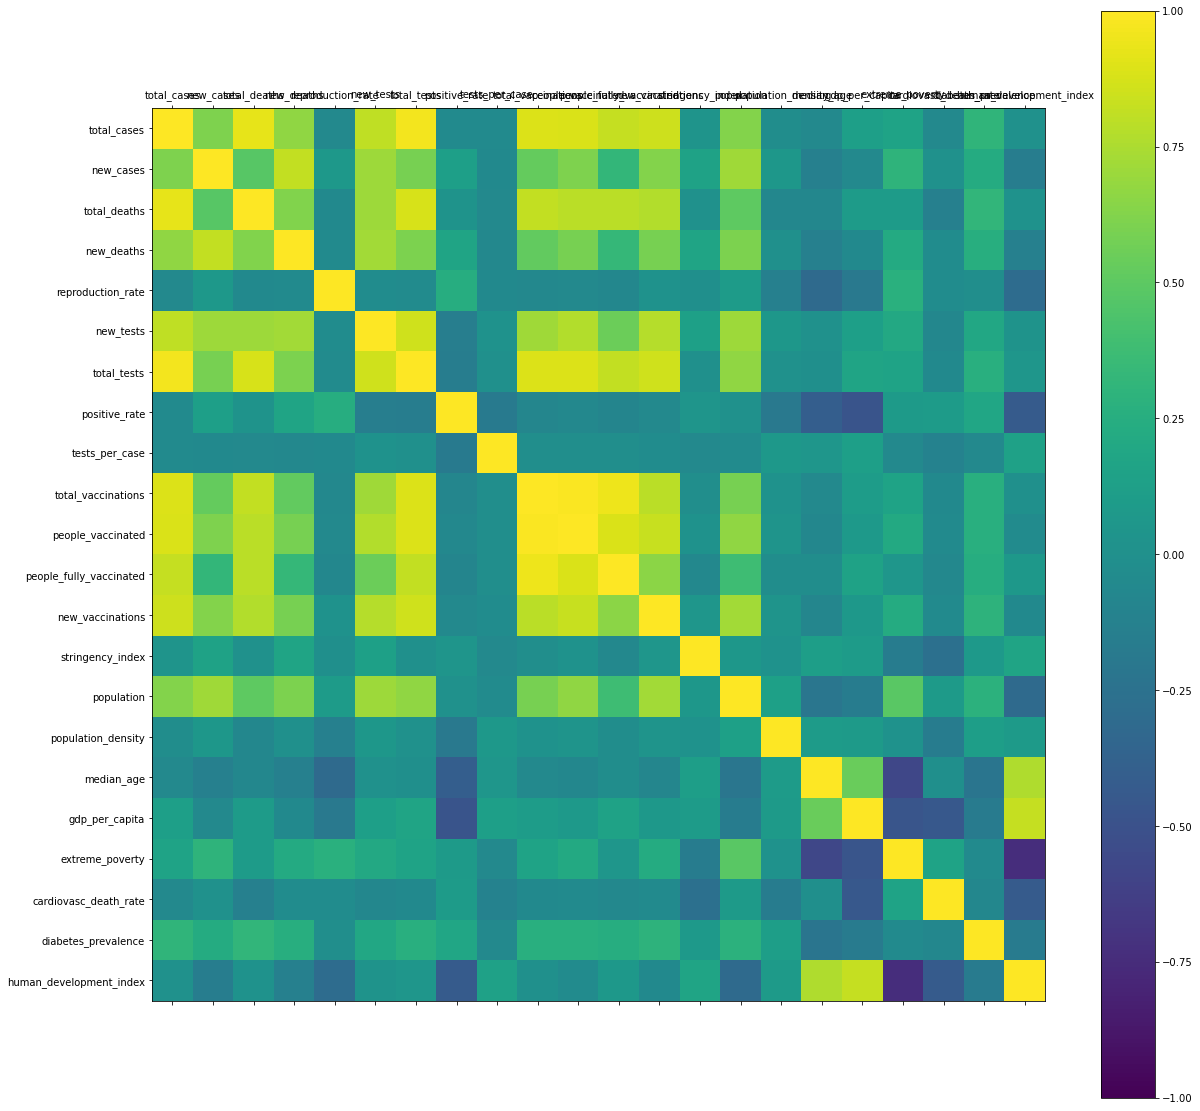

In [44]:
# Com os dados normalizados, vamos tirar a correlação e plotar
correlacao = dataset_2.corr()
colunas = dataset_2.columns.tolist()
# Plot
import numpy as np
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
cax = ax.matshow(correlacao, vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0, 22, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(colunas)
ax.set_yticklabels(colunas)
plt.show()

In [107]:
# Será transformada a variável target de variável contínua para categórica ordinal
# Os valores serão separados em: BAIXO, MEDIO, ALTO
# O range será definido como:
# - 0 à 0.66 será baixo
# - 0.67 à 1.34 será medio
# - 1.34 pra cima será alto

def fn_transforma_categoria(num):
    categoria = 'BAIXO'
    if num > 0.66 and num < 1.35:
        categoria = 'MEDIO'
    elif num > 1.34:
        categoria = 'ALTO'
    
    return categoria

var_target['reproduction_rate'] = var_target['reproduction_rate'].apply(fn_transforma_categoria)

,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,new_tests,total_tests,positive_rate,tests_per_case,total_vaccinations,...,new_vaccinations,stringency_index,population,population_density,median_age,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,human_development_index
1346,0.002836,0.002685,0.002691,0.002305,1.02,0.001038,0.000339,0.656455,0.000128,0.000009,...,0.000256,0.523914,0.001766,0.070859,0.685714,0.109156,0.017422,0.481046,0.553619,0.607748
1428,0.003881,0.000121,0.004029,0.000542,0.62,0.000776,0.000856,0.054705,0.004468,0.002011,...,0.001814,0.523914,0.001766,0.070859,0.685714,0.109156,0.017422,0.481046,0.553619,0.607748
1429,0.003883,0.000101,0.004034,0.000407,0.61,0.000710,0.000861,0.048140,0.004982,0.002044,...,0.001932,0.523914,0.001766,0.070859,0.685714,0.109156,0.017422,0.481046,0.553619,0.607748
1430,0.003884,0.000109,0.004039,0.000407,0.61,0.000680,0.000867,0.043764,0.005542,0.002063,...,0.001076,0.523914,0.001766,0.070859,0.685714,0.109156,0.017422,0.481046,0.553619,0.607748
1431,0.003886,0.000118,0.004041,0.000136,0.60,0.000778,0.000874,0.041575,0.005915,0.002111,...,0.002848,0.523914,0.001766,0.070859,0.685714,0.109156,0.017422,0.481046,0.553619,0.607748
1435,0.003889,0.000094,0.004056,0.000136,0.58,0.000833,0.000898,0.030635,0.008155,0.002226,...,0.001684,0.523914,0.001766,0.070859,0.685714,0.109156,0.017422,0.481046,0.553619,0.607748
1436,0.003890,0.000058,0.004059,0.000271,0.57,0.000802,0.000904,0.028446,0.008925,0.002255,...,0.001684,0.523914,0.001766,0.070859,0.685714,0.109156,0.017422,0.481046,0.553619,0.607748
1437,0.003891,0.000056,0.004063,0.000271,0.57,0.000813,0.000911,0.024070,0.010068,0.002274,...,0.001127,0.523914,0.001766,0.070859,0.685714,0.109156,0.017422,0.481046,0.553619,0.607748
1438,0.003892,0.000085,0.004064,0.000136,0.58,0.000833,0.000918,0.021882,0.010861,0.002291,...,0.000970,0.345333,0.001766,0.070859,0.685714,0.109156,0.017422,0.481046,0.553619,0.607748
1441,0.003894,0.000014,0.004071,0.000136,0.56,0.000526,0.000936,0.019694,0.013055,0.002343,...,0.001619,0.345333,0.001766,0.070859,0.685714,0.109156,0.017422,0.481046,0.553619,0.607748


## Feature Selection

In [111]:
from sklearn.ensemble import ExtraTreesClassifier

# Criação do modelo

modelo = ExtraTreesClassifier()
modelo.fit(var_predict.values, var_target.values[:])

# Print dos Resultados
print(var_predict.columns)
print(modelo.feature_importances_)

<ipython-input-111-a19162d72d09>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(var_predict.values, var_target.values[:])


Index(['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'new_tests',
       'total_tests', 'positive_rate', 'tests_per_case', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'stringency_index', 'population', 'population_density', 'median_age',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'human_development_index'],
      dtype='object')
[0.07103166 0.04653542 0.07014845 0.02619868 0.02812275 0.07031613
 0.06560555 0.06003458 0.07957746 0.07208419 0.08685859 0.02177384
 0.06180474 0.0249433  0.03204745 0.03108071 0.02658698 0.03789173
 0.02426563 0.02966827 0.03342389]
